## __Selecting A School in Singapore__: 
### *Beyond Grade-based Entry Requirements and Popular "Top" Schools*

By DC LIM

__Introduction__ 

Singapore is a small nation-state in South-east Asia, with a population of about 5 million people. Its education system ranks among the best in the world, where its students consistently come in among the top few worldwide in PISA scores. A good education is highly prized for it brings promise of a stable, high-paying job in the future. Hence, a place in the popular "top" schools is highly sought after, right down to primary (elementary) school. Good foundations pave the way for good test scores for entry into the best schools in the next level of the education system, so goes the general thinking. 

Practically every Singaporean parent with school-going children knows the game. The popular "top" schools are household names too. Some schools are also known for being the best at certain sports or competitive games. Based on performance in preliminary exams sat for in the final year of elementary and high school, each student roughly knows what "tier" of schools he/she can enter in the next level of the system. Grades are make or break, literally. 

However, basing a major decision on just 1 factor is a little shoddy and boring, isn't it? What about life outside school? Where can a student hang out with friends or go on a date after school? What are the lunch options available? For the tiger moms/dads out there - are there entertainment options aplenty nearby that might distract their children from going straight home for yet more study and revision?

For this project, I will put aside test scores and "top schools", and explore the neighbourhoods of schools in Singapore to identify various groups of schools that might cater to different profiles of students and their parents.

__Data__

Data on Singapore schools can be obtained from data.gov.sg, a publicly-accessible database maintained by the Singapore government that contains datasets on different aspects of the country.

The dataset relevant to this project can be downloaded as a csv file from the School Directory and Information page on the website, link below. The dataset contains the names of schools in Singapore and basic information for each such as address (including postal code), phone number, level (e.g. primary/secondary school) and so on. 

Postal codes are essential for the purposes of this project, since they will be geocoded to obtain the latitude and longitude of each school. This will allow us to tap on Foursquare's database to obtain the nearby venues for analysis and subsequent clustering using the K-means clustering machine learning technique.

We import the relevant Python libraries needed for this project as below, and ingest the dataset for exploration and analysis.

https://data.gov.sg/dataset/school-directory-and-information

In [2]:
#import libraries required for this project
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

import requests
import folium
from IPython.display import Image 
from IPython.core.display import HTML 

In [3]:
schools_df = pd.read_csv("Singapore schools and postal codes.csv")

In [4]:
schools_df.head()

,school_name,url_address,address,postal_code,telephone_no,telephone_no_2,fax_no,fax_no_2,email_address,mrt_desc,...,session_code,mainlevel_code,sap_ind,autonomous_ind,gifted_ind,ip_ind,mothertongue1_code,mothertongue2_code,mothertongue3_code,special_sdp_offered
0,ADMIRALTY PRIMARY SCHOOL,http://www.admiraltypri.moe.edu.sg/,11 WOODLANDS CIRCLE,738907,63620598,na,63627512,na,ADMIRALTY_PS@MOE.EDU.SG,Admiralty Station,...,FULL DAY,PRIMARY,No,No,No,No,Chinese,Malay,Tamil,"With globalization, it is important for our st..."
1,ADMIRALTY SECONDARY SCHOOL,http://www.admiraltysec.moe.edu.sg,31 WOODLANDS CRESCENT,737916,63651733,63654596,63652774,na,Admiralty_SS@moe.edu.sg,ADMIRALTY MRT,...,SINGLE SESSION,SECONDARY,No,No,No,No,Chinese,Malay,Tamil,Design Thinking is used as an anchor pedagogic...
2,AHMAD IBRAHIM PRIMARY SCHOOL,http://www.ahmadibrahimpri.moe.edu.sg,10 YISHUN STREET 11,768643,67592906,na,67592927,na,aips@moe.edu.sg,Yishun,...,SINGLE SESSION,PRIMARY,No,No,No,No,Chinese,Malay,Tamil,The 3Rs - Leader U Development programme- From...
3,AHMAD IBRAHIM SECONDARY SCHOOL,http://www.ahmadibrahimsec.moe.edu.sg,751 YISHUN AVENUE 7,768928,67585384,na,67557778,na,aiss@moe.edu.sg,YISHUN MRT,...,SINGLE SESSION,SECONDARY,No,No,No,No,Chinese,Malay,Tamil,1. Character Development through Outdoor Learn...
4,AI TONG SCHOOL,http://www.aitong.moe.edu.sg,100 Bright Hill Drive,579646,64547672,na,64532726,na,AITONG_SCH@MOE.EDU.SG,Bishan MRT,...,SINGLE SESSION,PRIMARY,Yes,No,No,No,Chinese,na,na,"As a Special Assistance Plan (SAP) school, Ai ..."


We do some quick exploratory data analysis

In [7]:
schools_df.shape

(345, 35)

In [6]:
schools_df.head()

,school_name,url_address,address,postal_code,telephone_no,telephone_no_2,fax_no,fax_no_2,email_address,mrt_desc,...,session_code,mainlevel_code,sap_ind,autonomous_ind,gifted_ind,ip_ind,mothertongue1_code,mothertongue2_code,mothertongue3_code,special_sdp_offered
0,ADMIRALTY PRIMARY SCHOOL,http://www.admiraltypri.moe.edu.sg/,11 WOODLANDS CIRCLE,738907,63620598,na,63627512,na,ADMIRALTY_PS@MOE.EDU.SG,Admiralty Station,...,FULL DAY,PRIMARY,No,No,No,No,Chinese,Malay,Tamil,"With globalization, it is important for our st..."
1,ADMIRALTY SECONDARY SCHOOL,http://www.admiraltysec.moe.edu.sg,31 WOODLANDS CRESCENT,737916,63651733,63654596,63652774,na,Admiralty_SS@moe.edu.sg,ADMIRALTY MRT,...,SINGLE SESSION,SECONDARY,No,No,No,No,Chinese,Malay,Tamil,Design Thinking is used as an anchor pedagogic...
2,AHMAD IBRAHIM PRIMARY SCHOOL,http://www.ahmadibrahimpri.moe.edu.sg,10 YISHUN STREET 11,768643,67592906,na,67592927,na,aips@moe.edu.sg,Yishun,...,SINGLE SESSION,PRIMARY,No,No,No,No,Chinese,Malay,Tamil,The 3Rs - Leader U Development programme- From...
3,AHMAD IBRAHIM SECONDARY SCHOOL,http://www.ahmadibrahimsec.moe.edu.sg,751 YISHUN AVENUE 7,768928,67585384,na,67557778,na,aiss@moe.edu.sg,YISHUN MRT,...,SINGLE SESSION,SECONDARY,No,No,No,No,Chinese,Malay,Tamil,1. Character Development through Outdoor Learn...
4,AI TONG SCHOOL,http://www.aitong.moe.edu.sg,100 Bright Hill Drive,579646,64547672,na,64532726,na,AITONG_SCH@MOE.EDU.SG,Bishan MRT,...,SINGLE SESSION,PRIMARY,Yes,No,No,No,Chinese,na,na,"As a Special Assistance Plan (SAP) school, Ai ..."


__Methodology__

We use the Nominatim library to centre the map on Singapore and the geopy library to geocode the postal codes of the Singapore schools

In [8]:
address = 'Singapore, SG'

geolocator = Nominatim(user_agent="sg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Singapore are 1.3408630000000001, 103.83039182212079.


In [10]:
import geopy
from geopy.extra.rate_limiter import RateLimiter

In [11]:
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

schools_df['location'] = schools_df['postal_code'].apply(geocode)


In [12]:
schools_df['point'] = schools_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

# split point column into latitude, longitude and altitude columns
schools_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(schools_df['point'].tolist(), index=schools_df.index)

In [13]:
#Drop the empty altitude column and remove rows with NA data under lat and long
schools_df.drop("altitude", axis=1)
schools_df.dropna(subset=["latitude"], axis=0, inplace=True)
schools_df.dropna(subset=["longitude"], axis=0, inplace=True)
schools_df.reset_index(drop=True)

,school_name,url_address,address,postal_code,telephone_no,telephone_no_2,fax_no,fax_no_2,email_address,mrt_desc,...,ip_ind,mothertongue1_code,mothertongue2_code,mothertongue3_code,special_sdp_offered,location,point,latitude,longitude,altitude
0,ADMIRALTY PRIMARY SCHOOL,http://www.admiraltypri.moe.edu.sg/,11 WOODLANDS CIRCLE,738907,63620598,na,63627512,na,ADMIRALTY_PS@MOE.EDU.SG,Admiralty Station,...,No,Chinese,Malay,Tamil,"With globalization, it is important for our st...","(Northwest, 738907, Singapore, (1.443015124145...","(1.4430151241456437, 103.80028198430566, 0.0)",1.443015,103.800282,0.0
1,ADMIRALTY SECONDARY SCHOOL,http://www.admiraltysec.moe.edu.sg,31 WOODLANDS CRESCENT,737916,63651733,63654596,63652774,na,Admiralty_SS@moe.edu.sg,ADMIRALTY MRT,...,No,Chinese,Malay,Tamil,Design Thinking is used as an anchor pedagogic...,"(Northwest, 737916, Singapore, (1.445960168499...","(1.4459601684991499, 103.80278481638744, 0.0)",1.445960,103.802785,0.0
2,AHMAD IBRAHIM PRIMARY SCHOOL,http://www.ahmadibrahimpri.moe.edu.sg,10 YISHUN STREET 11,768643,67592906,na,67592927,na,aips@moe.edu.sg,Yishun,...,No,Chinese,Malay,Tamil,The 3Rs - Leader U Development programme- From...,"(Northwest, 768643, Singapore, (1.433726765419...","(1.4337267654190344, 103.83274871474491, 0.0)",1.433727,103.832749,0.0
3,AHMAD IBRAHIM SECONDARY SCHOOL,http://www.ahmadibrahimsec.moe.edu.sg,751 YISHUN AVENUE 7,768928,67585384,na,67557778,na,aiss@moe.edu.sg,YISHUN MRT,...,No,Chinese,Malay,Tamil,1. Character Development through Outdoor Learn...,"(Lhotky, Kramolna, okres Náchod, Královéhradec...","(50.42251735, 16.116112899555517, 0.0)",50.422517,16.116113,0.0
4,AI TONG SCHOOL,http://www.aitong.moe.edu.sg,100 Bright Hill Drive,579646,64547672,na,64532726,na,AITONG_SCH@MOE.EDU.SG,Bishan MRT,...,No,Chinese,na,na,"As a Special Assistance Plan (SAP) school, Ai ...","(Central, 579646, Singapore, (1.36061808472064...","(1.3606180847206468, 103.83295304708206, 0.0)",1.360618,103.832953,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,ZHANGDE PRIMARY SCHOOL,http://www.zhangdepri.moe.edu.sg/,51 Jalan Membina,169485,62740357,na,62763042,na,ZHANGDE_PS@MOE.EDU.SG,Tiong Bahru MRT Station,...,No,Chinese,Malay,Tamil,The school believes in the holistic developmen...,"(Central, 169485, Singapore, (1.28426555755167...","(1.2842655575516795, 103.82606254103202, 0.0)",1.284266,103.826063,0.0
322,ZHENGHUA PRIMARY SCHOOL,http://www.zhenghuapri.moe.edu.sg,9 Fajar Road,679002,67697478,na,67636459,na,zhenghua_ps@moe.edu.sg,LRT: Fajar Station,...,No,Chinese,Malay,Tamil,Character Education takes centre stage in the ...,"(Northwest, 679002, Singapore, (1.379710980147...","(1.379710980147195, 103.76945499617278, 0.0)",1.379711,103.769455,0.0
323,ZHENGHUA SECONDARY SCHOOL,http://www.zhenghuasec.moe.edu.sg,91 SENJA ROAD,677741,67639455,na,67633577,na,ZHENGHUA_SS@MOE.EDU.SG,JELAPANG LRT,...,No,Chinese,Malay,Tamil,Learning for Life Programme (Outdoor Education...,"(Bukit Panjang, Northwest, 677741, Singapore, ...","(1.3889874252535928, 103.76527683024429, 0.0)",1.388987,103.765277,0.0
324,ZHONGHUA PRIMARY SCHOOL,http://www.zhonghuapri.moe.edu.sg,12 SERANGOON AVENUE 4,556095,62835413,na,62823882,na,zhonghua_ps@moe.edu.sg,"Ang Mo Kio MRT, Bishan MRT, Serangoon MRT",...,No,Chinese,Malay,Tamil,The school's Lifelong Learning Programme (LLP)...,"(Southeast, 556095, Singapore, (1.360219205698...","(1.3602192056982683, 103.86985484258189, 0.0)",1.360219,103.869855,0.0


Create a map of Singapore with the schools indicated by markers

In [14]:
map_sgschools = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, school in zip(schools_df['latitude'], schools_df['longitude'], schools_df['school_name']):
    label = folium.Popup(school, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sgschools)  
    
map_sgschools

As seen from the above, schools are pretty much present in all parts of Singapore except the water bodies (reservoirs), since land is limited on the island.

__Explore the neighbourhoods within 1 km radius around the schools using Foursquare data__

In [359]:
#Create a function to obtain Foursquare venue data.

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
                    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
CLIENT_ID =  # your Foursquare ID
CLIENT_SECRET = # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: A41QZAAAJYGLFYS0TCQHK22SFPOKVCBVTFSTN24COKHY2BSF
CLIENT_SECRET:G0LPFB5WUQUCDJKPNW4Z1SG2H1N54WI3HP1IRAXIVIB5OSF5


In [17]:
venues_nearschools = getNearbyVenues(names=schools_df['school_name'],
                                   latitudes=schools_df['latitude'],
                                   longitudes=schools_df['longitude']
                                  )

In [286]:
venues_nearschools.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ADMIRALTY PRIMARY SCHOOL,1.443015,103.800282,Kampung Admiralty Hawker Centre,1.439939,103.800774,Food Court
1,ADMIRALTY PRIMARY SCHOOL,1.443015,103.800282,McDonald's,1.445931,103.798101,Fast Food Restaurant
2,ADMIRALTY PRIMARY SCHOOL,1.443015,103.800282,Starbucks,1.439761,103.800659,Coffee Shop
3,ADMIRALTY PRIMARY SCHOOL,1.443015,103.800282,Superpets Warehouse / HQ,1.436848,103.806059,Pet Store
4,ADMIRALTY PRIMARY SCHOOL,1.443015,103.800282,Asia Ghani,1.437431,103.795388,Malay Restaurant


We compile a list of unique venue categories and identify categories that may be similar variations of the same venue type. We clean up such data to reduce noise in the subsequent analysis. For example, both "Hainan Restaurant" and "Hakka Restaurant" are both Chinese restaurants, which for the purposes of our analysis can be treated the same (since this isn't a study targeted at, say, food gourmands).

In [287]:
venuelist = venues_nearschools["Venue Category"].unique().tolist()
venuelist = sorted(venuelist)
venuelist

['ATM',
 'Airport',
 'American Restaurant',
 'Arcade',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Australian Restaurant',
 'Auto Garage',
 'Auto Workshop',
 'Automotive Shop',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Basketball Court',
 'Basketball Stadium',
 'Beach',
 'Beer Bar',
 'Beer Garden',
 'Beer Store',
 'Betting Shop',
 'Big Box Store',
 'Bike Trail',
 'Bistro',
 'Board Shop',
 'Boarding House',
 'Bookstore',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Bowling Green',
 'Breakfast Spot',
 'Brewery',
 'Bridge',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Cafeteria',
 'Café',
 'Canal',
 'Cantonese Restaurant',
 'Cave',
 'Cemetery',
 'Cha Chaan Teng',
 'Cheese Shop',
 'Chinese Aristocrat Restaurant',
 'Chinese Breakfast Place',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Churrascaria',
 'Climbing Gym',
 'Clothing

In [330]:
#Remove similar venues leaving just 1 of them

venues_nearschools["Venue Category"].replace("Zhejiang Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("South Indian Restaurant", "Indian Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Cantonese Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Metro Station", "Train Station", inplace=True)
venues_nearschools["Venue Category"].replace("Sushi Restaurant", "Japanese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Szechuan Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Shanghai Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Shaanxi Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Hotel Bar", "Hotel", inplace=True)
venues_nearschools["Venue Category"].replace("Hong Kong Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Hakka Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Hainan Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Gym Pool", "Gym", inplace=True)
venues_nearschools["Venue Category"].replace("Gym / Fitness Center", "Gym", inplace=True)
venues_nearschools["Venue Category"].replace("Garden Center", "Gym", inplace=True)
venues_nearschools["Venue Category"].replace("Airport Terminal", "Airport", inplace=True)
venues_nearschools["Venue Category"].replace("Auto Garage", "Auto Workshop", inplace=True)
venues_nearschools["Venue Category"].replace("Automotive Shop", "Auto Workshop", inplace=True)
venues_nearschools["Venue Category"].replace("Basketball Stadium", "Basketball Court", inplace=True)
venues_nearschools["Venue Category"].replace("Beer Bar", "Beer Garden", inplace=True)
venues_nearschools["Venue Category"].replace("Bowling Green", "Bowling Alley", inplace=True)
venues_nearschools["Venue Category"].replace("Bus Line", "Bus Stop", inplace=True)
venues_nearschools["Venue Category"].replace("Cha Chaan Teng", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Chinese Aristocrat Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Chinese Breakfast Place", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Dim Sum Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Fujian Restaurant", "Chinese Restaurant", inplace=True)


#Remove venue names that do not contain useful information
venues_nearschools = venues_nearschools[venues_nearschools["Venue Category"] != "Building"]
venues_nearschools = venues_nearschools[venues_nearschools["Venue Category"] != "Comfort Food Restaurant"]
venues_nearschools = venues_nearschools[venues_nearschools["Venue Category"] != "Food"]
venues_nearschools = venues_nearschools[venues_nearschools["Venue Category"] != "Other Great Outdoors"]


We prepare the dataset for K-means analysis to group the various school neighbourhoods into clusters

In [332]:
# one hot encoding
sgschools_onehot = pd.get_dummies(venues_nearschools[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sgschools_onehot['Neighbourhood'] = venues_nearschools['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [sgschools_onehot.columns[-1]] + list(sgschools_onehot.columns[:-1])
sg_df = sgschools_onehot[fixed_columns]

# group rows by neighbourhood and take the mean of the frequency of occurrence of each category
sg_grouped = sg_df.groupby('Neighbourhood').mean().reset_index()

In [333]:
sg_grouped.head()

,Neighbourhood,ATM,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo Exhibit
0,ADMIRALTY PRIMARY SCHOOL,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ADMIRALTY SECONDARY SCHOOL,0.043478,0.043478,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AHMAD IBRAHIM PRIMARY SCHOOL,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AHMAD IBRAHIM SECONDARY SCHOOL,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AI TONG SCHOOL,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [334]:
# write a function to sort venues in the dataset in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create a new dataframe that displays the top 10 venues for each school's neighbourhood.

In [344]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['school_name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['school_name'] = sg_grouped['Neighbourhood']

for ind in np.arange(sg_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sg_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,school_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADMIRALTY PRIMARY SCHOOL,Bus Station,Food Court,Supermarket,Basketball Court,Park,Coffee Shop,Fast Food Restaurant,ATM,Pool,Pet Store
1,ADMIRALTY SECONDARY SCHOOL,Coffee Shop,Food Court,Basketball Court,Park,Supermarket,ATM,Pool,Factory,Fast Food Restaurant,Chinese Restaurant
2,AHMAD IBRAHIM PRIMARY SCHOOL,Chinese Restaurant,Coffee Shop,Food Court,Indian Restaurant,Thai Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Bubble Tea Shop,Café,Noodle House
3,AHMAD IBRAHIM SECONDARY SCHOOL,Tennis Court,Airport,Zoo Exhibit,Food & Drink Shop,Film Studio,Fish & Chips Shop,Fishing Spot,Flea Market,Flower Shop,Food Court
4,AI TONG SCHOOL,Chinese Restaurant,Thai Restaurant,Café,Ice Cream Shop,Japanese Restaurant,Karaoke Bar,Steakhouse,Supermarket,Food Court,Spa


Initialise K-means modelling and find the optimal K value using the elbow method

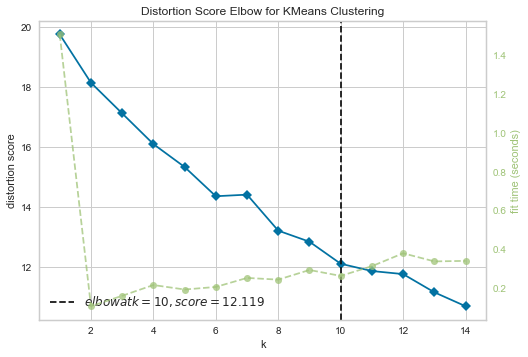

In [348]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

school_cluster = sg_grouped.drop('Neighbourhood', 1)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(school_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

From the chart above, we see that the optimal value of k is 10. Hence we build the model using k = 10.

In [349]:
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(school_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:30] 

array([6, 4, 5, 6, 5, 0, 1, 4, 6, 5, 5, 5, 8, 0, 8, 0, 0, 4, 4, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 0, 1])

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighbourhood

In [350]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

school_df2 = schools_df[["school_name", "latitude", "longitude"]]
school_df2.head()

,school_name,latitude,longitude
0,ADMIRALTY PRIMARY SCHOOL,1.443015,103.800282
1,ADMIRALTY SECONDARY SCHOOL,1.445960,103.802785
2,AHMAD IBRAHIM PRIMARY SCHOOL,1.433727,103.832749
3,AHMAD IBRAHIM SECONDARY SCHOOL,50.422517,16.116113
4,AI TONG SCHOOL,1.360618,103.832953


In [310]:
# merge tr_merged with the neighbourhoods_venues_sorted dataset to get cluster label and top 10 venues for each neighbourhood
schools_merged = school_df2.join(neighbourhoods_venues_sorted.set_index('school_name'), on='school_name')

schools_merged.head()

,school_name,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADMIRALTY PRIMARY SCHOOL,1.443015,103.800282,0.0,Bus Station,Food Court,Supermarket,Basketball Court,Park,Coffee Shop,Fast Food Restaurant,ATM,Pool,Pizza Place
1,ADMIRALTY SECONDARY SCHOOL,1.445960,103.802785,0.0,Coffee Shop,Food Court,Basketball Court,Park,Supermarket,ATM,Factory,Fast Food Restaurant,Chinese Restaurant,Café
2,AHMAD IBRAHIM PRIMARY SCHOOL,1.433727,103.832749,4.0,Chinese Restaurant,Coffee Shop,Food Court,Indian Restaurant,Thai Restaurant,Fried Chicken Joint,Vegetarian / Vegan Restaurant,Bubble Tea Shop,Café,Noodle House
3,AHMAD IBRAHIM SECONDARY SCHOOL,50.422517,16.116113,7.0,Tennis Court,Airport,Zoo Exhibit,Flower Shop,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fishing Spot,Flea Market,Food & Drink Shop
4,AI TONG SCHOOL,1.360618,103.832953,6.0,Chinese Restaurant,Thai Restaurant,Café,Ice Cream Shop,Japanese Restaurant,Pie Shop,Coffee Shop,Seafood Restaurant,Nature Preserve,Spa


In [351]:
#Drop na values from the Cluster_Labels column
schools_merged.dropna(subset=["Cluster_Labels"], axis=0, inplace=True)
schools_merged.reset_index(drop=True)

#Convert the Cluster Labels from float to integer for plotting
schools_merged["Cluster_Labels"] = schools_merged["Cluster_Labels"].astype(int)

schools_merged.sort_values(by=['Cluster_Labels'], inplace=True) 
schools_merged

,school_name,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADMIRALTY PRIMARY SCHOOL,1.443015,103.800282,0,Bus Station,Food Court,Supermarket,Basketball Court,Park,Coffee Shop,Fast Food Restaurant,ATM,Pool,Pizza Place
143,JURONG SECONDARY SCHOOL,1.330447,103.724018,0,Coffee Shop,Food Court,Bus Station,Park,Noodle House,Chinese Restaurant,Supermarket,Sandwich Place,Café,Garden
77,CORPORATION PRIMARY SCHOOL,1.351430,103.707614,0,Soccer Field,Bus Stop,Food Court,Coffee Shop,Grocery Store,Park,Shopping Mall,Flower Shop,Seafood Restaurant,Noodle House
132,HOUGANG SECONDARY SCHOOL,1.377930,103.882343,0,Food Court,Coffee Shop,Asian Restaurant,Café,Noodle House,Fast Food Restaurant,Italian Restaurant,Breakfast Spot,Fried Chicken Joint,Snack Place
244,ROSYTH SCHOOL,1.372870,103.874528,0,Food Court,Coffee Shop,Supermarket,Noodle House,Asian Restaurant,Chinese Restaurant,Italian Restaurant,Bus Stop,Breakfast Spot,Café
110,FUHUA SECONDARY SCHOOL,1.347186,103.724710,0,Food Court,Asian Restaurant,Fast Food Restaurant,Coffee Shop,Café,Chinese Restaurant,Stadium,Gas Station,Snack Place,Scenic Lookout
22,BEACON PRIMARY SCHOOL,1.383925,103.773755,0,Food Court,Basketball Court,Noodle House,Market,Supermarket,Park,Coffee Shop,Bike Trail,Fast Food Restaurant,Miscellaneous Shop
311,WESTWOOD SECONDARY SCHOOL,1.353578,103.701808,0,Fast Food Restaurant,Park,Sandwich Place,Coffee Shop,Bus Station,Food Court,Supermarket,Medical Center,Basketball Court,Soccer Field
315,WOODGROVE SECONDARY SCHOOL,1.428518,103.796557,0,Food Court,Bus Station,Fast Food Restaurant,Halal Restaurant,Gym,Supermarket,Pizza Place,Malay Restaurant,Park,Trail
319,WOODLANDS SECONDARY SCHOOL,1.439954,103.774424,0,Food Court,Park,Asian Restaurant,Karaoke Bar,Grocery Store,Pool,Café,Shopping Mall,Chinese Restaurant,Fast Food Restaurant


__Results__

We create a map to visualise the resulting clusters

In [352]:
import matplotlib.cm as cm
import matplotlib.colors as colors


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(schools_merged['latitude'], schools_merged['longitude'], schools_merged['school_name'], 
                                  schools_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [354]:
schools_merged["Cluster_Labels"].value_counts()

2    97
6    78
0    53
1    50
4    29
8     1
7     1
5     1
3     1
Name: Cluster_Labels, dtype: int64

We see that the most significant clusters are clusters 2, 6, 0, 1 and 4 in descending order of size. Clusters 8, 7, 5 and 3 are much smaller in size. For the purposes of our analysis, let us focus on the first group of clusters since it will offer more choices for our potential users within each cluster.

We examine each cluster in turn to understand the profile of the neighbourhood around the schools

In [315]:
schools_merged[schools_merged.Cluster_Labels == 2]

,school_name,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
282,TAMPINES MERIDIAN JUNIOR COLLEGE,1.376205,103.937877,2,Asian Restaurant,Furniture / Home Store,Gym,Pharmacy,Supermarket,Grocery Store,Park,Farm,Sandwich Place,Scandinavian Restaurant
217,PEIYING PRIMARY SCHOOL,1.417819,103.830281,2,Coffee Shop,Asian Restaurant,Park,Supermarket,Food Court,Farm,Stadium,Chinese Restaurant,Gym,Thai Restaurant
305,WELLINGTON PRIMARY SCHOOL,1.452126,103.822413,2,Coffee Shop,Bus Station,Fast Food Restaurant,Bar,Shopping Mall,Buffet,Shop & Service,Seafood Restaurant,Food Court,Food & Drink Shop
307,WEST SPRING PRIMARY SCHOOL,1.389412,103.766268,2,Supermarket,Pharmacy,Food Court,Coffee Shop,Fast Food Restaurant,Asian Restaurant,Gym,Bus Stop,Bus Station,Food Stand
61,CHIJ ST. JOSEPH'S CONVENT,1.391874,103.902503,2,Fast Food Restaurant,Food Court,Coffee Shop,Supermarket,Shopping Mall,Japanese Restaurant,Sandwich Place,Restaurant,Noodle House,Chinese Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,CHONGZHENG PRIMARY SCHOOL,1.350577,103.950844,2,Coffee Shop,Bakery,Japanese Restaurant,Café,Gym,Chinese Restaurant,Clothing Store,Spa,Steakhouse,Supermarket
322,XINMIN PRIMARY SCHOOL,1.371398,103.883051,2,Coffee Shop,Food Court,Asian Restaurant,Noodle House,Italian Restaurant,Gym,Café,Cemetery,Breakfast Spot,Chinese Restaurant
176,NAN CHIAU HIGH SCHOOL,1.389336,103.890173,2,Fast Food Restaurant,Food Court,Coffee Shop,Gym,Noodle House,Betting Shop,Steakhouse,Supermarket,Shopping Mall,Beer Garden
75,COMPASSVALE SECONDARY SCHOOL,1.396566,103.900259,2,Fast Food Restaurant,Coffee Shop,Food Court,Japanese Restaurant,Sandwich Place,Supermarket,Gym,Café,Shopping Mall,Sculpture Garden


In [316]:
schools_merged[schools_merged.Cluster_Labels == 6]

,school_name,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,ANGLO-CHINESE SCHOOL (PRIMARY),1.318647,103.835157,6,Chinese Restaurant,Hotel,Japanese Restaurant,Italian Restaurant,Dessert Shop,Café,Seafood Restaurant,Sandwich Place,Coffee Shop,Ramen Restaurant
24,BEDOK GREEN PRIMARY SCHOOL,1.324050,103.937829,6,Chinese Restaurant,Coffee Shop,Food Court,Seafood Restaurant,Thai Restaurant,Ice Cream Shop,Bakery,Noodle House,Café,French Restaurant
14,ANGLO-CHINESE SCHOOL (BARKER ROAD),1.319700,103.835645,6,Chinese Restaurant,Café,Hotel,Japanese Restaurant,Bakery,Italian Restaurant,Ramen Restaurant,Seafood Restaurant,Sandwich Place,Coffee Shop
23,BEATTY SECONDARY SCHOOL,1.341522,103.852233,6,Chinese Restaurant,Seafood Restaurant,Coffee Shop,Food Court,Noodle House,Bakery,Asian Restaurant,Cosmetics Shop,Gym,Market
313,WHITLEY SECONDARY SCHOOL,1.355525,103.842566,6,Chinese Restaurant,Food Court,Thai Restaurant,Spa,Grocery Store,Café,Japanese Restaurant,Pet Store,Karaoke Bar,Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,CEDAR GIRLS' SECONDARY SCHOOL,1.334614,103.874283,6,Food Court,Chinese Restaurant,Convenience Store,Asian Restaurant,Noodle House,Hotel,Grocery Store,Market,Gas Station,Furniture / Home Store
210,PAYA LEBAR METHODIST GIRLS' SCHOOL (SECONDARY),1.350494,103.885470,6,Noodle House,Food Court,Dessert Shop,Bakery,Coffee Shop,Chinese Restaurant,Asian Restaurant,Sandwich Place,Snack Place,Breakfast Spot
209,PAYA LEBAR METHODIST GIRLS' SCHOOL (PRIMARY),1.349923,103.884973,6,Noodle House,Coffee Shop,Chinese Restaurant,Food Court,Asian Restaurant,Bakery,Soccer Field,Dessert Shop,Supermarket,Sandwich Place
235,RAFFLES GIRLS' SCHOOL (SECONDARY),1.342850,103.843154,6,Chinese Restaurant,Flower Shop,Seafood Restaurant,Noodle House,Café,Bakery,Train Station,Gastropub,Thai Restaurant,Park


In [317]:
schools_merged[schools_merged.Cluster_Labels == 0]

,school_name,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADMIRALTY PRIMARY SCHOOL,1.443015,103.800282,0,Bus Station,Food Court,Supermarket,Basketball Court,Park,Coffee Shop,Fast Food Restaurant,ATM,Pool,Pizza Place
241,RIVERSIDE PRIMARY SCHOOL,1.447311,103.801826,0,Coffee Shop,Food Court,Basketball Court,Supermarket,Park,ATM,Factory,Airport,Pool,Bus Station
42,CANBERRA PRIMARY SCHOOL,1.450873,103.815585,0,Coffee Shop,Food Court,Fast Food Restaurant,Bus Station,Japanese Restaurant,Park,Food Truck,Shopping Mall,Shop & Service,Bistro
229,QIHUA PRIMARY SCHOOL,1.441977,103.788368,0,Food Court,Indian Restaurant,Frozen Yogurt Shop,Japanese Restaurant,Clothing Store,Sandwich Place,Park,Ice Cream Shop,Malay Restaurant,Café
221,PRESBYTERIAN HIGH SCHOOL,1.382558,103.842739,0,Food Court,Chinese Restaurant,Bus Stop,Pool,Fast Food Restaurant,Stadium,Noodle House,Coffee Shop,Malay Restaurant,College Auditorium
219,PIONEER PRIMARY SCHOOL,1.348772,103.694801,0,Fast Food Restaurant,Food Court,Food & Drink Shop,Supermarket,Park,Residential Building (Apartment / Condo),Bus Station,Shopping Mall,Noodle House,Seafood Restaurant
204,PALM VIEW PRIMARY SCHOOL,1.384010,103.891199,0,Food Court,Grocery Store,Snack Place,Café,College Cafeteria,Fried Chicken Joint,Noodle House,Chinese Restaurant,Fast Food Restaurant,Betting Shop
198,NORTHOAKS PRIMARY SCHOOL,1.456955,103.813545,0,Food Court,Indoor Play Area,Restaurant,Bus Station,Food & Drink Shop,Fishing Spot,Seafood Restaurant,Coffee Shop,Bar,Buffet
193,NORTH VISTA SECONDARY SCHOOL,1.381704,103.898712,0,Food Court,Indonesian Restaurant,Fast Food Restaurant,Trail,Supermarket,Basketball Court,Bus Station,Fried Chicken Joint,Dessert Shop,Breakfast Spot
192,NORTH VISTA PRIMARY SCHOOL,1.382915,103.895966,0,Food Court,Snack Place,Fast Food Restaurant,Fried Chicken Joint,Trail,Supermarket,Noodle House,Residential Building (Apartment / Condo),Chinese Restaurant,Grocery Store


In [318]:
schools_merged[schools_merged.Cluster_Labels == 1]

,school_name,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
294,TELOK KURAU PRIMARY SCHOOL,1.324186,103.928569,1,Chinese Restaurant,Coffee Shop,Bakery,Hotpot Restaurant,Burger Joint,Malay Restaurant,Sporting Goods Shop,Bookstore,Soup Place,Dessert Shop
165,MARYMOUNT CONVENT SCHOOL,1.340393,103.839857,1,Flower Shop,Train Station,Café,Chinese Restaurant,Seafood Restaurant,Bakery,Park,Sandwich Place,Fast Food Restaurant,Food Court
287,TANJONG KATONG GIRLS' SCHOOL,1.307863,103.896223,1,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Indian Restaurant,Bar,Vietnamese Restaurant,Ice Cream Shop,Café,Bakery,Coffee Shop
302,VICTORIA JUNIOR COLLEGE,1.305993,103.919882,1,Beach,American Restaurant,Park,Coffee Shop,Chinese Restaurant,Café,Massage Studio,Sports Bar,Mexican Restaurant,Pizza Place
247,"SCHOOL OF THE ARTS, SINGAPORE",1.299372,103.848738,1,Hotel,Ice Cream Shop,Bubble Tea Shop,Café,Hotpot Restaurant,History Museum,Gift Shop,Miscellaneous Shop,Other Repair Shop,Whisky Bar
141,JURONG PIONEER JUNIOR COLLEGE,50.748269,15.218554,1,Athletics & Sports,Bakery,Ski Area,Auto Workshop,Food & Drink Shop,Film Studio,Fish & Chips Shop,Fishing Spot,Flea Market,Flower Shop
325,YANGZHENG PRIMARY SCHOOL,1.348729,103.868493,1,Asian Restaurant,Chinese Restaurant,Coffee Shop,Clothing Store,Dessert Shop,Park,Fast Food Restaurant,Cosmetics Shop,Supermarket,Sandwich Place
124,HAIG GIRLS' SCHOOL,1.311601,103.902729,1,Coffee Shop,Chinese Restaurant,Restaurant,Asian Restaurant,Vietnamese Restaurant,Bar,Indian Restaurant,Bakery,Dessert Shop,Ice Cream Shop
336,YUHUA SECONDARY SCHOOL,49.545527,15.385107,1,Restaurant,Historic Site,Lake,Farm,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fishing Spot,Zoo Exhibit
308,WEST SPRING SECONDARY SCHOOL,1.388118,103.759946,1,Bus Station,Supermarket,Asian Restaurant,Residential Building (Apartment / Condo),Bus Stop,Bubble Tea Shop,Café,Chinese Restaurant,Bistro,Gym


In [319]:
schools_merged[schools_merged.Cluster_Labels == 4]

,school_name,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,BOON LAY GARDEN PRIMARY SCHOOL,1.342899,103.712983,4,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Shopping Mall,Food Court,Indian Restaurant,Snack Place,Farmers Market,Wings Joint,Bookstore
64,CHONGFU SCHOOL,1.438767,103.839296,4,Coffee Shop,Food Court,Fast Food Restaurant,Convenience Store,Thai Restaurant,Multiplex,Indian Restaurant,College Bookstore,Seafood Restaurant,Shopping Mall
335,YUHUA PRIMARY SCHOOL,1.342698,103.740936,4,Chinese Restaurant,Coffee Shop,Food Court,Indian Restaurant,Halal Restaurant,Pool,Diner,Ramen Restaurant,Fast Food Restaurant,Sandwich Place
95,EUNOS PRIMARY SCHOOL,1.324709,103.904580,4,Food Court,Chinese Restaurant,Coffee Shop,Asian Restaurant,Noodle House,Bubble Tea Shop,Restaurant,Furniture / Home Store,Diner,Motorcycle Shop
266,ST. ANDREW'S SECONDARY SCHOOL,1.330980,103.866011,4,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Food Court,Convenience Store,Market,Ice Cream Shop,Photography Studio,Restaurant,Noodle House
249,SEMBAWANG SECONDARY SCHOOL,1.445661,103.816660,4,Chinese Restaurant,Coffee Shop,Japanese Restaurant,Fast Food Restaurant,Food Court,Café,Steakhouse,Betting Shop,Bistro,Food Truck
106,FRONTIER PRIMARY SCHOOL,1.336827,103.699633,4,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Japanese Restaurant,Asian Restaurant,Food Court,Stadium,Gym,Bookstore,Electronics Store
265,ST. ANDREW'S JUNIOR SCHOOL,1.331448,103.865024,4,Chinese Restaurant,Coffee Shop,Food Court,Fast Food Restaurant,Convenience Store,Noodle House,Soccer Stadium,Gym,Asian Restaurant,Photography Studio
320,XINGHUA PRIMARY SCHOOL,1.358152,103.890572,4,Chinese Restaurant,Coffee Shop,Food Court,Noodle House,Bakery,Café,Soccer Field,Breakfast Spot,Supermarket,Thai Restaurant
264,ST. ANDREW'S JUNIOR COLLEGE,1.332567,103.863530,4,Chinese Restaurant,Coffee Shop,Convenience Store,Fast Food Restaurant,Market,Noodle House,Food Court,Ice Cream Shop,Restaurant,Seafood Restaurant


Create a new map with the 5 top clusters that allows for easy visualisation where readers can select the cluster(s) they want to see depending on their preferences.

In [356]:
#Subset dataset to get only data in the top 5 clusters

schools_merged2 = schools_merged[schools_merged.Cluster_Labels.isin([2, 6, 0, 1, 4])]

new_map = folium.Map(location=[latitude, longitude], zoom_start=11)

from branca.colormap import linear
from folium import FeatureGroup, LayerControl, Map, Marker

for grp_name, df_grp in schools_merged2.groupby('Cluster_Labels'):
    feature_group = folium.FeatureGroup(grp_name)
    for row in df_grp.itertuples():
        folium.CircleMarker(location=[row.latitude, row.longitude], radius = 5, fill = True, fill_opacity=0.7,
                            popup = folium.Popup(row.school_name + ' Cluster ' + str(row.Cluster_Labels), parse_html=True), 
                            fill_color=rainbow[grp_name-1], color=rainbow[grp_name-1]).add_to(feature_group)
    feature_group.add_to(new_map)

folium.LayerControl().add_to(new_map)    



In [357]:
new_map

__Discussion__

*Observations based on the clusters generated from Kmeans modelling and visualisation of the cluster locations*

Cluster 2 - Majority of the school neighbourhoods have Coffee Shop as the first most common venue. Fast Food Restaurant occurs frequently in the top or second top venue. Japanese Restaurant, Shopping Mall, Sandwich Place and Supermarket appear more frequently in this cluster compared to other clusters. Schools in this cluster are predominantly located in the northern half of Singapore.

Cluster 6 - This cluster is predominantly comprised of F&B businesses in the top 10 venues. Majority of the school neighbourhoods have Chinese Restaurant as the first most common venue. Food court appears frequently in the top or second top venue. Cafe, Fried Chicken Joint, Frozen Yogurt Shop and Vegan/vegetarian Restaurant appear more frequently in this cluster compared to other clusters. Schools in this cluster are predominantly located in the southern half of Singapore.

Cluster 0 -  Majority of the school neighbourhoods have Food Court as the first most common venue. Park, Bar and Bus Station appear more frequently in this cluster compared to other clusters. Sports/exercise venues such as Pool, Gym, Trail and Soccer Stadium appear with the highest frequency in this cluster compared to other clusters. Schools in this cluster are predominantly located in north and west of Singapore.

Cluster 1 - Wide mix of venue categories come under first most common venue in this cluster - no obvious trend. Hotel, Fish & Chips Shop and Filipino Restaurant appear more frequently in this cluster compared to other clusters. Overall, there is a wide mix of F&B and recreational/entertainment venues; the widest amongst the 5 clusters. Schools in this cluster are predominantly located in south and east of Singapore.

Cluster 4 - Like Cluster 6, this cluster is predominantly comprised of F&B businesses in the top 10 venues, though to a lesser extent since it has more recreational venues like Bowling Alley, Multiplex and Bookstore. Majority of the school neighbourhoods have either Chinese Restaurant or Coffee shop as the first most common venue. Fast Food Restaurant, Food Court and Chinese Restaurant also occur frequently in the top 4 venues. This is the smallest cluster, and the schools are scattered throughout Singapore, except for the south.

__What type of "users" would prefer each cluster profile?__

Parents may prefer to send their children to a school in either Cluster 6 or 4 if they want their children to have a quick meal after school before heading home. There are not many recreational options that may pose distractions. These may be for families where both parents have full-time day jobs, and are unable to pick up their kids immediately after school.

Parents may prefer to send their children to a school in Cluster 0 if they are keen to have their children adopt a healthy lifestyle that can make use of the amenities that tend to be close by, such as Pool, Soccer Stadium etc.

Students may choose to enroll in a school in either Cluster 2, 6 or 1 if they want access to a wider variety of recreational and entertainment options after school where they can hang out with friends.

__Conclusion__

In conclusion, we can see that the neighbourhoods around schools in Singapore can be clusterd into 5 big and distinct groups, each with their own profile based on the most common venue types found in them. The study can provide further information for both students and parents alike in selecting schools based on the type of neighbourhoods they are in, in addition to the usual grade-based entry requirements, popular brand names, sporting excellence and so on.